In [19]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

#plot in the cell
%matplotlib inline
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = mpimg.imread("./input.jpg")

In [21]:
type(im)

numpy.ndarray

In [22]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
weights_path = "model/model_final_f10217.pkl"
#cfg.merge_from_file(model_file_path)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = weights_path
predictor = DefaultPredictor(cfg)

outputs = predictor(im)

In [23]:
print(im.shape)
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
outputs["instances"].pred_classes
outputs["instances"].pred_boxes

(480, 640, 3)


Boxes(tensor([[124.6308, 246.0555, 464.5736, 480.0000],
        [250.5950, 157.1207, 339.5731, 408.2415],
        [ 49.3506, 274.3738,  80.1652, 342.3896],
        [  0.0000, 284.6656,  78.5014, 478.5184],
        [386.0469, 270.9830, 411.8350, 303.1007],
        [334.2236, 251.3125, 414.0236, 277.6147],
        [331.4684, 231.2236, 393.7103, 257.4648],
        [561.0319, 271.5630, 594.9162, 390.1004],
        [512.4014, 276.6873, 563.4663, 389.4302],
        [329.3685, 230.3824, 402.1460, 278.3009],
        [526.8883, 277.4476, 561.6942, 344.5837],
        [114.9138, 268.0710, 145.6501, 397.1750],
        [113.1456, 267.1171, 159.3613, 395.6359]], device='cuda:0'))

In [24]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
output = v.get_image()[:, :, ::-1]
# cv2_imshow(v.get_image()[:, :, ::-1])

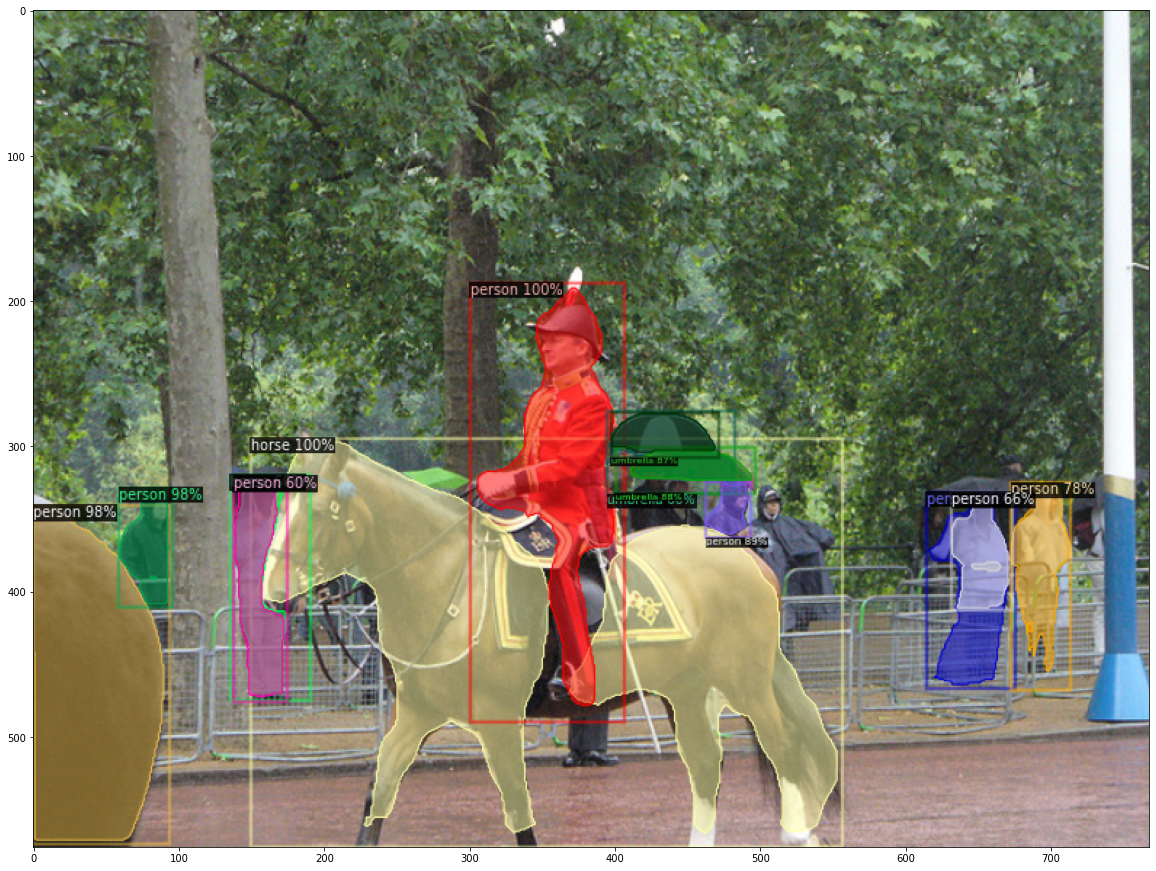

In [25]:
plt.figure(figsize = (20, 16))
plt.imshow(output)

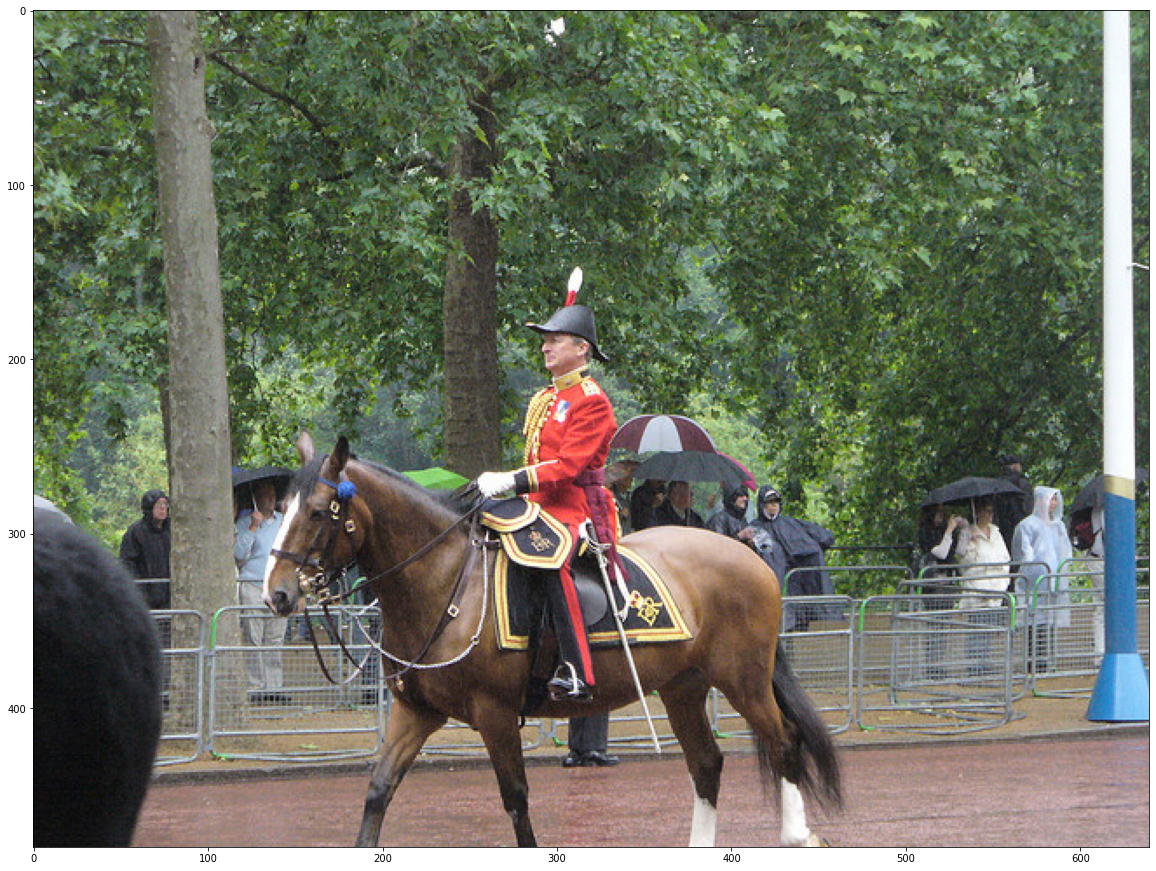

In [27]:
plt.figure(figsize = (20, 16))
plt.imshow(im)